### Manipulation of Peaks de novo results of ETNP 2017 P2 samples LC-MS/MS data using python.

Starting with:

    Peaks de novo results (.csv) of PTM-optimized database searches

Goal:

    Files with stripped (no PTMs) peptide lists and
    Columns with #'s of each modification in every sequence
    Column with stripped peptide lengths (# amino acids)
    
### To use:

#### 1. Change the input file name in *IN 4*
#### 2. Change output file name in *IN 6*, *IN 7*, *IN 8*

We don't have technical duplicates here, sadly, unlike the MED4 Pro samples. I exported PeaksDN search results CSVs into my ETNP 2017 git repo:

In [1]:
cd /home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/ETNP-SKQ17/PEAKS-PTMopt/

/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/ETNP-SKQ17/PEAKS-PTMopt


In [2]:
ls

ETNP-SKQ17-231-100m-0.3-JA2_DN50.csv
ETNP-SKQ17-231-100m-0.3-JA2_DN50_ptm.csv
ETNP-SKQ17-231-100m-0.3-JA2_DN50_stripped_peptides.txt
ETNP-SKQ17-233-265m-0.3-JA4_DN50.csv
ETNP-SKQ17-233-265m-0.3-JA4_DN50_ptm.csv
ETNP-SKQ17-233-265m-0.3-JA4_DN50_stripped.csv
ETNP-SKQ17-233-265m-0.3-JA4_DN50_stripped_peptides.txt
ETNP-SKQ17-243-965m-0.3-JA14_DN50.csv
ETNP-SKQ17-243-965m-0.3-JA14_DN50_ptm.csv
ETNP-SKQ17-243-965m-0.3-JA14_DN50_stripped.csv
ETNP-SKQ17-243-965m-0.3-JA14_DN50_stripped_peptides.txt
ETNP-SKQ17-243-965m-0.3-JA14_DN80_stripped_peptides.txt
ETNP-SKQ17-273-965m-trap_DN50.csv
ETNP-SKQ17-273-965m-trap_DN50_ptm.csv
ETNP-SKQ17-273-965m-trap_DN50_stripped.csv
ETNP-SKQ17-273-965m-trap_DN50_stripped_peptides.txt
ETNP-SKQ17-273-965m-trap_DN80_stripped_peptides.txt
ETNP-SKQ17-278-265m-trap_DN50.csv
ETNP-SKQ17-278-265m-trap_DN50_ptm.csv
ETNP-SKQ17-278-265m-trap_DN50_stripped.csv
ETNP-SKQ17-278-265m-trap_DN50_stripped_peptides.txt
ETNP-SKQ17-278-265m-trap_DN80_stripped_peptides.txt
ETNP-SKQ17-

In [3]:
# LIBRARIES
#import pandas library for working with tabular data
import os
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kde
#import regular expresson (regex)
import re
#check pandas version
pd.__version__

'1.0.5'

## 231: 100 m McLane pump filtered on 0.3 um GF-75

In [4]:
#read the CSV into a datadrame we name 'comet' using the pandas read_csv function
peaks = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/ETNP-SKQ17/PEAKS-PTMopt/ETNP-SKQ17-231-100m-0.3-JA2_DN50.csv")


#look at the dataframe
peaks.head()

,Fraction,Scan,Source File,Peptide,Tag Length,ALC (%),length,m/z,z,RT,Area,Mass,ppm,PTM,local confidence (%),tag (>=0%),mode
0,1,14924,20170410_ETNP-231-100m-0.3um-JA2_01.raw,EN(+.98)LAALEK,8,98,8,444.7382,2,50.59,38500000.0,887.4600,2.0,Deamidation (NQ),98 99 100 99 98 99 100 96,EN(+.98)LAALEK,CID
1,1,11873,20170410_ETNP-231-100m-0.3um-JA2_01.raw,EN(+.98)N(+.98)LLAK,7,98,7,402.2114,2,41.36,7910000.0,802.4072,1.2,Deamidation (NQ),97 98 97 98 99 99 99,EN(+.98)N(+.98)LLAK,CID
2,1,16508,20170410_ETNP-231-100m-0.3um-JA2_01.raw,TGN(+.98)FLDPK,8,98,8,446.7253,2,55.16,5860000.0,891.4338,2.6,Deamidation (NQ),94 97 99 99 99 99 99 98,TGN(+.98)FLDPK,CID
3,1,27852,20170410_ETNP-231-100m-0.3um-JA2_01.raw,WLVNHPR,7,97,7,461.2513,2,81.49,1550000.0,920.4980,-10.8,NaN,99 100 100 96 97 97 98,WLVNHPR,CID
4,1,15671,20170410_ETNP-231-100m-0.3um-JA2_01.raw,TDENLPLGPK,10,97,10,542.2884,2,52.76,10900000.0,1082.5608,1.3,NaN,98 99 100 99 100 97 98 95 98 95,TDENLPLGPK,CID


In [5]:
# use a count function to enumerate the # of ccarbamidomethylated C's in each peptide
peaks['c-carb'] = peaks['Peptide'].str.count("57.02")

# use a count function to enumerate the # of oxidized M's in each peptide
peaks['m-oxid'] = peaks['Peptide'].str.count("15.99")

# use a lamba function to enumerate the # of deamidated N's in each peptide
# used to use peaks['n-deam'] = peaks['Peptide'].str.count("N\(+.98") but that didn't work with the 'N'

peaks['n-deam'] = peaks['Peptide'].apply(lambda x: x.count('N(+.98)'))

# use a count function to enumerate the # of deamidated Q's in each peptide
peaks['q-deam'] = peaks['Peptide'].apply(lambda x: x.count('Q(+.98)'))

# use a count function to enumerate the # of hydroxylated K's in each peptide
peaks['k-hydr'] = peaks['Peptide'].apply(lambda x: x.count('K(+15.99)'))

# use a count function to enumerate the # of hydroxylated P's in each peptide
peaks['p-hydr'] = peaks['Peptide'].apply(lambda x: x.count('P(+15.99)'))

# use a count function to enumerate the # of methylated K's in each peptide
peaks['k-meth'] = peaks['Peptide'].apply(lambda x: x.count('K(+14.02)'))

# use a count function to enumerate the # of methylated R's in each peptide
peaks['r-meth'] = peaks['Peptide'].apply(lambda x: x.count('R(+14.02)'))

# create a column with 'stripped' peptide sequences using strip
peaks['stripped peptide'] = peaks['Peptide'].str.replace(r"\(.*\)","")

# add a column with the stripped peptide length (number of AAs)
peaks['stripped length'] = peaks['stripped peptide'].apply(len)

# total the number of modifications in sequence
peaks['ptm-total'] = peaks['c-carb'] + peaks['m-oxid'] + peaks['n-deam'] + peaks['q-deam'] + peaks['k-hydr'] + peaks['p-hydr'] + peaks['k-meth'] + peaks['r-meth']

# total the number of modifications in sequence relative to # of AAs
peaks['ptm-norm'] = peaks['ptm-total'] / peaks['stripped length']

# write modified dataframe to new txt file, same name + 'stripped'
peaks.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/ETNP-SKQ17/PEAKS-PTMopt/ETNP-SKQ17-378-100m-trap_DN50_stripped.csv")


# check out the results
peaks.head()

,Fraction,Scan,Source File,Peptide,Tag Length,ALC (%),length,m/z,z,RT,...,n-deam,q-deam,k-hydr,p-hydr,k-meth,r-meth,stripped peptide,stripped length,ptm-total,ptm-norm
0,1,14924,20170410_ETNP-231-100m-0.3um-JA2_01.raw,EN(+.98)LAALEK,8,98,8,444.7382,2,50.59,...,1,0,0,0,0,0,ENLAALEK,8,1,0.125000
1,1,11873,20170410_ETNP-231-100m-0.3um-JA2_01.raw,EN(+.98)N(+.98)LLAK,7,98,7,402.2114,2,41.36,...,2,0,0,0,0,0,ENLLAK,6,2,0.333333
2,1,16508,20170410_ETNP-231-100m-0.3um-JA2_01.raw,TGN(+.98)FLDPK,8,98,8,446.7253,2,55.16,...,1,0,0,0,0,0,TGNFLDPK,8,1,0.125000
3,1,27852,20170410_ETNP-231-100m-0.3um-JA2_01.raw,WLVNHPR,7,97,7,461.2513,2,81.49,...,0,0,0,0,0,0,WLVNHPR,7,0,0.000000
4,1,15671,20170410_ETNP-231-100m-0.3um-JA2_01.raw,TDENLPLGPK,10,97,10,542.2884,2,52.76,...,0,0,0,0,0,0,TDENLPLGPK,10,0,0.000000


### Visualizing the results

In [ ]:
print("ALC max: ", peaks['ALC (%)'].max())
print("ALC min: ", peaks['ALC (%)'].min())

Text(0.5, 1.0, 'Arginine methylation')

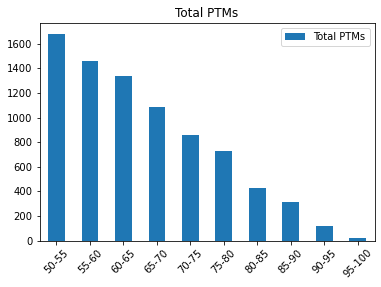

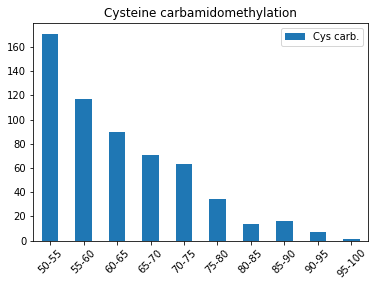

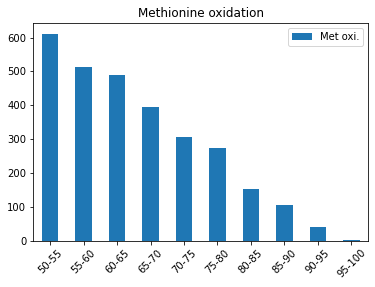

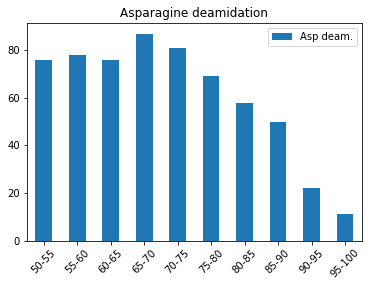

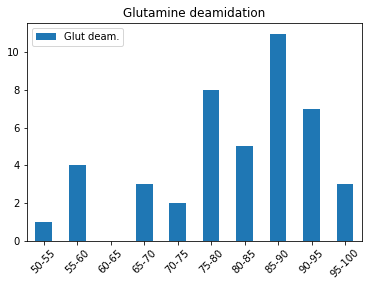

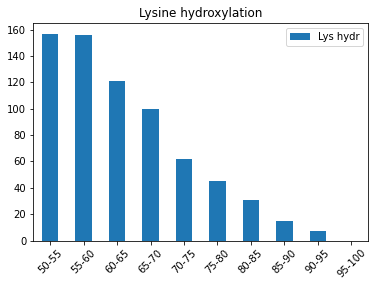

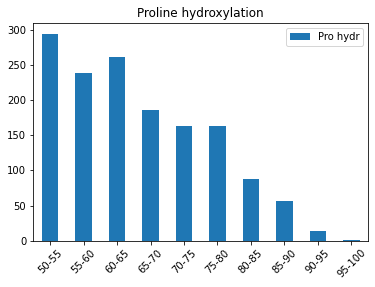

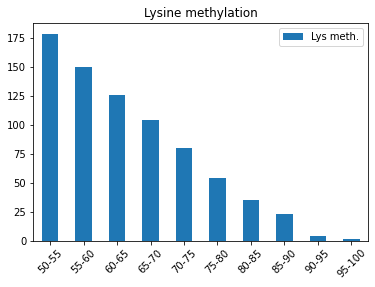

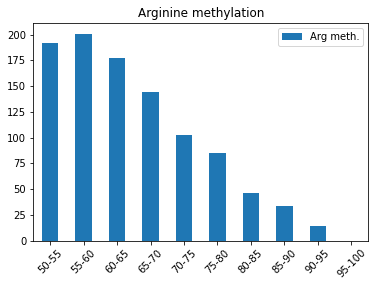

In [6]:
# making evenly spaced bins for the ALC data based on the min and max, called above
bins = [50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
labels = ['50-55', '55-60', '60-65', '65-70', '70-75', '75-80', '80-85', '85-90', '90-95', '95-100']

# use pandas cut function to do the binning itself
peaks['binned'] = pd.cut(peaks['ALC (%)'], bins=bins, labels=labels)

# bar plots of binned PTM data

index = ['50-55', '55-60', '60-65', '65-70', '70-75', '75-80', '80-85', '85-90', '90-95', '95-100']
data = {'Total PTMs': [peaks.groupby('binned')['ptm-total'].sum()['50-55'], peaks.groupby('binned')['ptm-total'].sum()['55-60'], peaks.groupby('binned')['ptm-total'].sum()['60-65'], peaks.groupby('binned')['ptm-total'].sum()['65-70'], peaks.groupby('binned')['ptm-total'].sum()['70-75'], peaks.groupby('binned')['ptm-total'].sum()['75-80'], peaks.groupby('binned')['ptm-total'].sum()['80-85'], peaks.groupby('binned')['ptm-total'].sum()['85-90'], peaks.groupby('binned')['ptm-total'].sum()['90-95'], peaks.groupby('binned')['ptm-total'].sum()['95-100']],
        'Cys carb.': [peaks.groupby('binned')['c-carb'].sum()['50-55'], peaks.groupby('binned')['c-carb'].sum()['55-60'], peaks.groupby('binned')['c-carb'].sum()['60-65'], peaks.groupby('binned')['c-carb'].sum()['65-70'], peaks.groupby('binned')['c-carb'].sum()['70-75'], peaks.groupby('binned')['c-carb'].sum()['75-80'], peaks.groupby('binned')['c-carb'].sum()['80-85'], peaks.groupby('binned')['c-carb'].sum()['85-90'], peaks.groupby('binned')['c-carb'].sum()['90-95'], peaks.groupby('binned')['c-carb'].sum()['95-100']],
        'Met oxi.': [peaks.groupby('binned')['m-oxid'].sum()['50-55'], peaks.groupby('binned')['m-oxid'].sum()['55-60'], peaks.groupby('binned')['m-oxid'].sum()['60-65'], peaks.groupby('binned')['m-oxid'].sum()['65-70'], peaks.groupby('binned')['m-oxid'].sum()['70-75'], peaks.groupby('binned')['m-oxid'].sum()['75-80'], peaks.groupby('binned')['m-oxid'].sum()['80-85'], peaks.groupby('binned')['m-oxid'].sum()['85-90'], peaks.groupby('binned')['m-oxid'].sum()['90-95'], peaks.groupby('binned')['m-oxid'].sum()['95-100']],
        'Asp deam.': [peaks.groupby('binned')['n-deam'].sum()['50-55'], peaks.groupby('binned')['n-deam'].sum()['55-60'], peaks.groupby('binned')['n-deam'].sum()['60-65'], peaks.groupby('binned')['n-deam'].sum()['65-70'], peaks.groupby('binned')['n-deam'].sum()['70-75'], peaks.groupby('binned')['n-deam'].sum()['75-80'], peaks.groupby('binned')['n-deam'].sum()['80-85'], peaks.groupby('binned')['n-deam'].sum()['85-90'], peaks.groupby('binned')['n-deam'].sum()['90-95'], peaks.groupby('binned')['n-deam'].sum()['95-100']],
        'Glut deam.': [peaks.groupby('binned')['q-deam'].sum()['50-55'], peaks.groupby('binned')['q-deam'].sum()['55-60'], peaks.groupby('binned')['q-deam'].sum()['60-65'], peaks.groupby('binned')['q-deam'].sum()['65-70'], peaks.groupby('binned')['q-deam'].sum()['70-75'], peaks.groupby('binned')['q-deam'].sum()['75-80'], peaks.groupby('binned')['q-deam'].sum()['80-85'], peaks.groupby('binned')['q-deam'].sum()['85-90'], peaks.groupby('binned')['q-deam'].sum()['90-95'], peaks.groupby('binned')['q-deam'].sum()['95-100']],
        'Lys hydr': [peaks.groupby('binned')['k-hydr'].sum()['50-55'], peaks.groupby('binned')['k-hydr'].sum()['55-60'], peaks.groupby('binned')['k-hydr'].sum()['60-65'], peaks.groupby('binned')['k-hydr'].sum()['65-70'], peaks.groupby('binned')['k-hydr'].sum()['70-75'], peaks.groupby('binned')['k-hydr'].sum()['75-80'], peaks.groupby('binned')['k-hydr'].sum()['80-85'], peaks.groupby('binned')['k-hydr'].sum()['85-90'], peaks.groupby('binned')['k-hydr'].sum()['90-95'], peaks.groupby('binned')['k-hydr'].sum()['95-100']],
        'Pro hydr': [peaks.groupby('binned')['p-hydr'].sum()['50-55'], peaks.groupby('binned')['p-hydr'].sum()['55-60'], peaks.groupby('binned')['p-hydr'].sum()['60-65'], peaks.groupby('binned')['p-hydr'].sum()['65-70'], peaks.groupby('binned')['p-hydr'].sum()['70-75'], peaks.groupby('binned')['p-hydr'].sum()['75-80'], peaks.groupby('binned')['p-hydr'].sum()['80-85'], peaks.groupby('binned')['p-hydr'].sum()['85-90'], peaks.groupby('binned')['p-hydr'].sum()['90-95'], peaks.groupby('binned')['p-hydr'].sum()['95-100']],
        'Lys meth.': [peaks.groupby('binned')['k-meth'].sum()['50-55'], peaks.groupby('binned')['k-meth'].sum()['55-60'], peaks.groupby('binned')['k-meth'].sum()['60-65'], peaks.groupby('binned')['k-meth'].sum()['65-70'], peaks.groupby('binned')['k-meth'].sum()['70-75'], peaks.groupby('binned')['k-meth'].sum()['75-80'], peaks.groupby('binned')['k-meth'].sum()['80-85'], peaks.groupby('binned')['k-meth'].sum()['85-90'], peaks.groupby('binned')['k-meth'].sum()['90-95'], peaks.groupby('binned')['k-meth'].sum()['95-100']],
        'Arg meth.': [peaks.groupby('binned')['r-meth'].sum()['50-55'], peaks.groupby('binned')['r-meth'].sum()['55-60'], peaks.groupby('binned')['r-meth'].sum()['60-65'], peaks.groupby('binned')['r-meth'].sum()['65-70'], peaks.groupby('binned')['r-meth'].sum()['70-75'], peaks.groupby('binned')['r-meth'].sum()['75-80'], peaks.groupby('binned')['r-meth'].sum()['80-85'], peaks.groupby('binned')['r-meth'].sum()['85-90'], peaks.groupby('binned')['r-meth'].sum()['90-95'], peaks.groupby('binned')['r-meth'].sum()['95-100']]
        }

peaksbin = pd.DataFrame(data, columns=['Total PTMs','Cys carb.','Met oxi.','Asp deam.', 'Glut deam.', 'Lys hydr', 'Pro hydr', 'Lys meth.', 'Arg meth.'], index=index)

# write the peaks bin ptm dataframe to a csv:
peaksbin.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/ETNP-SKQ17/PEAKS-PTMopt/ETNP-SKQ17-231-100m-0.3-JA2_DN50_ptm.csv")

ax1 = peaksbin.plot.bar(y='Total PTMs', rot=45)
ax1.set_title('Total PTMs')

ax2 = peaksbin.plot.bar(y='Cys carb.', rot=45)
ax2.set_title('Cysteine carbamidomethylation')

ax3 = peaksbin.plot.bar(y='Met oxi.', rot=45)
ax3.set_title('Methionine oxidation')

ax4 = peaksbin.plot.bar(y='Asp deam.', rot=45)
ax4.set_title('Asparagine deamidation')

ax5 = peaksbin.plot.bar(y='Glut deam.', rot=45)
ax5.set_title('Glutamine deamidation')

ax6 = peaksbin.plot.bar(y='Lys hydr', rot=45)
ax6.set_title('Lysine hydroxylation')

ax7 = peaksbin.plot.bar(y='Pro hydr', rot=45)
ax7.set_title('Proline hydroxylation')

ax8 = peaksbin.plot.bar(y='Lys meth.', rot=45)
ax8.set_title('Lysine methylation')

ax9 = peaksbin.plot.bar(y='Arg meth.', rot=45)
ax9.set_title('Arginine methylation')


In [7]:
# Summing binned PTM occurances - not working yet!

peaksbin['Total PTMs'] = pd.to_numeric(peaksbin['Total PTMs'])

peaksbin.loc['sums'] = peaksbin.sum(numeric_only=True, axis=0)

peaksbin.loc['rel'] = peaksbin.div(2)['sums']

print(peaksbin)

KeyError: 'sums'

In [ ]:
# NOT WORKING YET

# make a new dataframe of relative PTM occurance

# fist pass as numeric
peaks['ptm-total', 'c-carb'] = pd.to_numeric(peaks['ptm-total', 'c-carb'])

data = {'1': [peaks['ptm-total'].sum()], '2': [peaks['c-carb'].sum()]}
#data = {peaks[['ptm-total', 'c-carb', 'm-oxid', 'n-deam', 'q-deam', 'k-hydr', 'p-hydr', 'k-meth', 'r-meth' ]].sum()}

ptmrel = pd.DataFrame(data, columns = ['1', '2'])

ptmrel.head()

### Exporting txt files of stripped peptides at confidence cutoffs:

In [10]:
# keep only peptide column >50% ALC
pep = peaks[["stripped peptide"]]

# write altered dataframe to new txt file
# used header and index parameters to get rid of 'Peptide' header and the indexing

pep.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/ETNP-SKQ17/PEAKS-PTMopt/ETNP-SKQ17-231-100m-0.3-JA2_DN50_stripped_peptides.txt", header=False, index=False)


# look

print("# of DN peptide >50% ALC", len(pep))
pep.head()

# of DN peptide >50% ALC 5312


,stripped peptide
0,ENLAALEK
1,ENLLAK
2,TGNFLDPK
3,WLVNHPR
4,TDENLPLGPK


In [11]:
# keep only peptides  >80% ALC
peaks80 = peaks.loc[peaks['ALC (%)'] >= 80]

# see how many rows and double check
# peaks80.head(-10)

# keep only peptide column 
pep80 = peaks80[["stripped peptide"]]

# write altered dataframe to new txt file
# used header and index parameters to get rid of 'Peptide' header and the indexing

pep80.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/ETNP-SKQ17/PEAKS-PTMopt/ETNP-SKQ17-231-100m-0.3-JA2_DN50_stripped_peptides.txt", header=False, index=False)


print("# of DN peptide >80% ALC", len(pep80))
pep80.head()

# of DN peptide >80% ALC 1140


,stripped peptide
0,ENLAALEK
1,ENLLAK
2,TGNFLDPK
3,WLVNHPR
4,TDENLPLGPK


### Using BioPython to query peptide sequences

I installed the BioPython package using `pip install biopython`. All instructions and information [here](https://www.tutorialspoint.com/biopython/index.htm). 

GitHub project: https://github.com/biopython/biopython

I'm relying on the ProtParam module to parse sequences for relative AA composition, instability, secondary structure, instability, and hydrophobicity. You can read more about that module and the studies the indecies are derived from here:

https://biopython.org/wiki/ProtParam

In [14]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

x = ProteinAnalysis("/home/millieginty/Documents/git-repos/2017-etnp/data/MED4/MED2_tryp_1raw_db_peptides_nmod.fasta")  

print x.count_amino_acids()

SyntaxError: invalid syntax (<ipython-input-14-18af01f52ff6>, line 5)

In [28]:
from Bio import SeqIO
for seq_record in SeqIO.parse("/home/millieginty/Documents/git-repos/2017-etnp/data/MED4/MED2_tryp_1raw_db_peptides_nmod.fasta", "fasta"):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))


SKPFNDGFNAATGDYVDMSAAGIVDPAK
Seq('SKPFNDGFNAATGDYVDMSAAGIVDPAK')
28
SKPFNDGFNAATGDYVDMSAAGIVDPAK
Seq('SKPFNDGFNAATGDYVDMSAAGIVDPAK')
28
GPAPLSLALAHVDVDDDAVLVK
Seq('GPAPLSLALAHVDVDDDAVLVK')
22
DADFSEVDLHGTTLTLSDLK
Seq('DADFSEVDLHGTTLTLSDLK')
20
AKNTGVEYAQGLVALGGDDEELAK
Seq('AKNTGVEYAQGLVALGGDDEELAK')
24
DPNQTVNPDEVVAVGAAIQGGVLAGEVK
Seq('DPNQTVNPDEVVAVGAAIQGGVLAGEVK')
28
ILQGYQYVAANPDEVCPANWTPGEK
Seq('ILQGYQYVAANPDEVCPANWTPGEK')
25
AAIEEGVVSGGGQTLIEISNELSNSR
Seq('AAIEEGVVSGGGQTLIEISNELSNSR')
26
ANDCPSLDSSLVGSISLGNGDSLK
Seq('ANDCPSLDSSLVGSISLGNGDSLK')
24
KEISDDLTTGIDIITNALLEPTK
Seq('KEISDDLTTGIDIITNALLEPTK')
23
TPGFTGADLANLLNEAAILAAR
Seq('TPGFTGADLANLLNEAAILAAR')
22
SGLQNAASIAGMVLTTECIVADLPEKK
Seq('SGLQNAASIAGMVLTTECIVADLPEKK')
27
IIGYDAYTQSQGTAFAVFQGR
Seq('IIGYDAYTQSQGTAFAVFQGR')
21
VNYAGISGTEGGANTNNFAESELEKA
Seq('VNYAGISGTEGGANTNNFAESELEKA')
26
VGALVNGDGLPTGWQGHIAFTDK
Seq('VGALVNGDGLPTGWQGHIAFTDK')
23
FIDSLELASHLANVGDSK
Seq('FIDSLELASHLANVGDSK')
18
VPTPNVSAVDFVFESSK
Seq('VPTPNVSAVDFVFES

Seq('TGKDNFAGCEDPGVISVTK')
19
SEMLLQMAELGIPTEK
Seq('SEMLLQMAELGIPTEK')
16
TPLTAATLAIQSQK
Seq('TPLTAATLAIQSQK')
14
KNPYSLILLDEIEK
Seq('KNPYSLILLDEIEK')
14
ELTVDLLIGADGANSR
Seq('ELTVDLLIGADGANSR')
16
DINLYGLNLSVEPIEK
Seq('DINLYGLNLSVEPIEK')
16
EGYFPVAPNDTAQDIR
Seq('EGYFPVAPNDTAQDIR')
16
VDSEINELEDKDSK
Seq('VDSEINELEDKDSK')
14
IHIVQVGDTITSISNLYSIKK
Seq('IHIVQVGDTITSISNLYSIKK')
21
SCAGSTILLSQETVQEYIR
Seq('SCAGSTILLSQETVQEYIR')
19
GAALNAVQIAELLIAK
Seq('GAALNAVQIAELLIAK')
16
FADVDVVNNIANGGPVLSDSLAFLDCK
Seq('FADVDVVNNIANGGPVLSDSLAFLDCK')
27
QSSTNYYADLYAK
Seq('QSSTNYYADLYAK')
13
TSNFGSEINGVGLQLGEDEITK
Seq('TSNFGSEINGVGLQLGEDEITK')
22
QIDVLLSNSIDDIQR
Seq('QIDVLLSNSIDDIQR')
15
EATSKEDYEAMK
Seq('EATSKEDYEAMK')
12
FSVLSNPEFLAEGTAINDLENPDR
Seq('FSVLSNPEFLAEGTAINDLENPDR')
24
LTGLGQKDEADAAAVEAMR
Seq('LTGLGQKDEADAAAVEAMR')
19
GQSVEEYNNYLDSYANPLLEK
Seq('GQSVEEYNNYLDSYANPLLEK')
21
GSEFLKEPLASELK
Seq('GSEFLKEPLASELK')
14
NTGTWSVENINDIVLGQR
Seq('NTGTWSVENINDIVLGQR')
18
LITNPGGDFLLQPGQVLIAFGSK
Seq('LITNPGG

LVLEGADIIQTEGGK
Seq('LVLEGADIIQTEGGK')
15
GLFSAQYAEENHFLFPSLK
Seq('GLFSAQYAEENHFLFPSLK')
19
AASFLEDAIQNK
Seq('AASFLEDAIQNK')
12
GIILSGGPSSVYEDNAPK
Seq('GIILSGGPSSVYEDNAPK')
18
SIFLTECLLILPSK
Seq('SIFLTECLLILPSK')
14
GNPDTTYGWWAGNSGVANR
Seq('GNPDTTYGWWAGNSGVANR')
19
YQVEPDDIADVISK
Seq('YQVEPDDIADVISK')
14
VFMLHSPQVASLK
Seq('VFMLHSPQVASLK')
13
QNNFVVLGISK
Seq('QNNFVVLGISK')
11
FCTGGMSLGALSR
Seq('FCTGGMSLGALSR')
13
FANNENLQNFEEDSK
Seq('FANNENLQNFEEDSK')
15
LLQNTWNLLFK
Seq('LLQNTWNLLFK')
11
SEVLSEFYEDLKK
Seq('SEVLSEFYEDLKK')
13
KGDEIQILAPSSFIDNEEDFIK
Seq('KGDEIQILAPSSFIDNEEDFIK')
22
VVAMKPLQQIK
Seq('VVAMKPLQQIK')
11
LSIENVDSDTDEFAGTFVAIQPSDTDMGSK
Seq('LSIENVDSDTDEFAGTFVAIQPSDTDMGSK')
30
SGEALSGINFDK
Seq('SGEALSGINFDK')
12
RVTNAISNIDSATVTLKD
Seq('RVTNAISNIDSATVTLKD')
18
VIPDPSLPVYAAIAPWSEK
Seq('VIPDPSLPVYAAIAPWSEK')
19
SKFDFPVESWLK
Seq('SKFDFPVESWLK')
12
IVLFLEGLVDHADDK
Seq('IVLFLEGLVDHADDK')
15
LLIDQYQIGWDK
Seq('LLIDQYQIGWDK')
12
ELSIIECAQDGKDNQYK
Seq('ELSIIECAQDGKDNQYK')
17
YQGGVNAGHTIVVD

NYLISGLVDDYR
Seq('NYLISGLVDDYR')
12
VDAAIETIVDSVVEGK
Seq('VDAAIETIVDSVVEGK')
16
AILLNVGLNDTPTIGQK
Seq('AILLNVGLNDTPTIGQK')
17
GVPISISEPDKESSIR
Seq('GVPISISEPDKESSIR')
16
SLNISIAGVTPEFLDVR
Seq('SLNISIAGVTPEFLDVR')
17
EINAGEITVLTK
Seq('EINAGEITVLTK')
12
QGSPNRPGTPNRPGTPYR
Seq('QGSPNRPGTPNRPGTPYR')
18
ILDTSVIIDGR
Seq('ILDTSVIIDGR')
11
QVTVDRPDYAGR
Seq('QVTVDRPDYAGR')
12
ELLIGGLDENTK
Seq('ELLIGGLDENTK')
12
NLEPWEAVIGLETHVQLNTK
Seq('NLEPWEAVIGLETHVQLNTK')
20
IDGELINETTFTPFLK
Seq('IDGELINETTFTPFLK')
16
LGGTPVIFLTAK
Seq('LGGTPVIFLTAK')
12
YAIVGHSEPR
Seq('YAIVGHSEPR')
10
LRELAYLNGGVK
Seq('LRELAYLNGGVK')
12
EDMPYLPDGTPVDIVLNPLGVPSR
Seq('EDMPYLPDGTPVDIVLNPLGVPSR')
24
HSIFVTEK
Seq('HSIFVTEK')
8
FGVDGIIETR
Seq('FGVDGIIETR')
10
MCAEEIVEASK
Seq('MCAEEIVEASK')
11
EVFFEVIPYLDAR
Seq('EVFFEVIPYLDAR')
13
FASTVHWITSSDPK
Seq('FASTVHWITSSDPK')
14
FLFVVDPIKNINPLK
Seq('FLFVVDPIKNINPLK')
15
NAGFNGDVVIADIKR
Seq('NAGFNGDVVIADIKR')
15
LSDLPENAMNYLR
Seq('LSDLPENAMNYLR')
13
ISVSIGPSNFNASR
Seq('ISVSIGPSNFNASR')
14
E

YCNCHPEIIAK
Seq('YCNCHPEIIAK')
11
INPDEDIVSSGLISK
Seq('INPDEDIVSSGLISK')
15
LDGVHTVFGK
Seq('LDGVHTVFGK')
10
FLTVEEPLEEILK
Seq('FLTVEEPLEEILK')
13
VLIHEEENVR
Seq('VLIHEEENVR')
10
ELQDIIAILGLDELSEEDR
Seq('ELQDIIAILGLDELSEEDR')
19
ELPIQPDFCGR
Seq('ELPIQPDFCGR')
11
LDDLISMVAVVR
Seq('LDDLISMVAVVR')
12
YELITETGHLK
Seq('YELITETGHLK')
11
SVGELLQNQVR
Seq('SVGELLQNQVR')
11
CSDVIGQSSALK
Seq('CSDVIGQSSALK')
12
DHGEIICPR
Seq('DHGEIICPR')
9
MSHISTGGGASLELLEGK
Seq('MSHISTGGGASLELLEGK')
18
TIPGSIFNR
Seq('TIPGSIFNR')
9
LIQPLSLSILSR
Seq('LIQPLSLSILSR')
12
TRFLVNPTGK
Seq('TRFLVNPTGK')
10
TPGAIGYVNQSYIK
Seq('TPGAIGYVNQSYIK')
14
NGHSIPVVAK
Seq('NGHSIPVVAK')
10
EFNVLLDVK
Seq('EFNVLLDVK')
9
YLESAATDGHR
Seq('YLESAATDGHR')
11
EYNALFNSPAKPLFNR
Seq('EYNALFNSPAKPLFNR')
16
YIYVSSAGVYK
Seq('YIYVSSAGVYK')
11
ASNLGAFWEIIQK
Seq('ASNLGAFWEIIQK')
13
IFSGNNNPYSVYGPFYK
Seq('IFSGNNNPYSVYGPFYK')
17
ILGMGDVLTLVEK
Seq('ILGMGDVLTLVEK')
13
SILEPAGALSIAGMK
Seq('SILEPAGALSIAGMK')
15
LLGFFVGQLMK
Seq('LLGFFVGQLMK')
11
IVAQLLFLEAEDP

10
EDQVDSYAK
Seq('EDQVDSYAK')
9
ENALAWAIQK
Seq('ENALAWAIQK')
10
HTIYGVTNNNLNK
Seq('HTIYGVTNNNLNK')
13
TPQHYSNDIDNPR
Seq('TPQHYSNDIDNPR')
13
HTPFFAGYRPQFY
Seq('HTPFFAGYRPQFY')
13
SEFVPLMQK
Seq('SEFVPLMQK')
9
AAEESKDELQQTLEGSDLVFIAAGMGGGTGTGAAPVVAEVAK
Seq('AAEESKDELQQTLEGSDLVFIAAGMGGGTGTGAAPVVAEVAK')
42
GFNANNGEYENLNESGILDPTKVIR
Seq('GFNANNGEYENLNESGILDPTKVIR')
25
LNISAICGELDVDGLRGDIVTNR
Seq('LNISAICGELDVDGLRGDIVTNR')
23
LAASLDQRPENVLSSIK
Seq('LAASLDQRPENVLSSIK')
17
QFWCEGQASK
Seq('QFWCEGQASK')
10
SNLSTNLNGIHENNDDDILK
Seq('SNLSTNLNGIHENNDDDILK')
20
NKEYLLSLTLR
Seq('NKEYLLSLTLR')
11
DIGTTVFPNAELK
Seq('DIGTTVFPNAELK')
13
QGSPNRPGTPYR
Seq('QGSPNRPGTPYR')
12
LENDVPLVVPEVNACEALK
Seq('LENDVPLVVPEVNACEALK')
19
NYSPISSILK
Seq('NYSPISSILK')
10
SVDIILSNCVLNLVNPESR
Seq('SVDIILSNCVLNLVNPESR')
19
NFYPQQYQTDSEFNINHNYLK
Seq('NFYPQQYQTDSEFNINHNYLK')
21
VRDLFEQAKK
Seq('VRDLFEQAKK')
10
VVEVYGPESSGK
Seq('VVEVYGPESSGK')
12
LANIVVPK
Seq('LANIVVPK')
8
NLVTSQQPLIDK
Seq('NLVTSQQPLIDK')
12
EGDVEEAAAAAIR
Seq('EGD

LFGIAFAGK
Seq('LFGIAFAGK')
9
CDCRPQLEAALAR
Seq('CDCRPQLEAALAR')
13
MELPLDHFR
Seq('MELPLDHFR')
9
SYGNSSENSDFENGR
Seq('SYGNSSENSDFENGR')
15
EEVFIDK
Seq('EEVFIDK')
7
ETEDIFDYLK
Seq('ETEDIFDYLK')
10
VLLAQPYLSDTVR
Seq('VLLAQPYLSDTVR')
13
LHGVQFHPESVLTQFGHK
Seq('LHGVQFHPESVLTQFGHK')
18
LQIQNNNSLISIR
Seq('LQIQNNNSLISIR')
13
DCWNRPVILFK
Seq('DCWNRPVILFK')
11
AMFSWLK
Seq('AMFSWLK')
7
FTELVQER
Seq('FTELVQER')
8
LSSDQIGR
Seq('LSSDQIGR')
8
VLESVSLEK
Seq('VLESVSLEK')
9
IIGLGESK
Seq('IIGLGESK')
8
DQSLNNCFQK
Seq('DQSLNNCFQK')
10
LLAIYDTEGYSK
Seq('LLAIYDTEGYSK')
12
IYNYDDQYLK
Seq('IYNYDDQYLK')
10
QRVVTDFSEITGSKPER
Seq('QRVVTDFSEITGSKPER')
17
SEMGANTLLEPFLLPVTK
Seq('SEMGANTLLEPFLLPVTK')
18
NYGVGAQILTDLGIK
Seq('NYGVGAQILTDLGIK')
15
AALEASVR
Seq('AALEASVR')
8
TEAGESYLIK
Seq('TEAGESYLIK')
10
TQVSIDYKK
Seq('TQVSIDYKK')
9
TGILSQLLSR
Seq('TGILSQLLSR')
10
RTTPSVVAYTK
Seq('RTTPSVVAYTK')
11
AESVAVTLGPK
Seq('AESVAVTLGPK')
11
DINFIFNKK
Seq('DINFIFNKK')
9
YHNLISTFK
Seq('YHNLISTFK')
9
IPALATVK
Seq('IPALATVK')
8
STA

IEEQEELSK
Seq('IEEQEELSK')
9
DIDNPLYK
Seq('DIDNPLYK')
8
MQMYLADCQFPDIDNQVK
Seq('MQMYLADCQFPDIDNQVK')
18
SNYEVVR
Seq('SNYEVVR')
7
NFDNPHEWIDLVALK
Seq('NFDNPHEWIDLVALK')
15
LNYTVTSDSQIQSIK
Seq('LNYTVTSDSQIQSIK')
15
VAIAFQER
Seq('VAIAFQER')
8
QPLNGIAR
Seq('QPLNGIAR')
8
VGVLLELNCETDFVAR
Seq('VGVLLELNCETDFVAR')
16
LEDIRFPIAF
Seq('LEDIRFPIAF')
10
EGQNIVIEGR
Seq('EGQNIVIEGR')
10
ISGGSSANTVVCLAELDNNVQFIGR
Seq('ISGGSSANTVVCLAELDNNVQFIGR')
25
FLDSWR
Seq('FLDSWR')
6
GWNQTGGDFDQR
Seq('GWNQTGGDFDQR')
12
LISFINPEKDVDGLNEQNIGK
Seq('LISFINPEKDVDGLNEQNIGK')
21
MIENLLSSIK
Seq('MIENLLSSIK')
10
LAEMVIDAVPSVEMVR
Seq('LAEMVIDAVPSVEMVR')
16
VGTNHQLILNKYPVQK
Seq('VGTNHQLILNKYPVQK')
16
FVSNLQIK
Seq('FVSNLQIK')
8
LSNISLLR
Seq('LSNISLLR')
8
ELLTNVALR
Seq('ELLTNVALR')
9
VDEGSIVFSTSTR
Seq('VDEGSIVFSTSTR')
13
TGTTIEIDGQVWR
Seq('TGTTIEIDGQVWR')
13
IIFLGEQVTSDTANR
Seq('IIFLGEQVTSDTANR')
15
DEFLLFR
Seq('DEFLLFR')
7
IYDFYEVSR
Seq('IYDFYEVSR')
9
ENIQPSSEENQIVEDLTNKESPEKLPEFK
Seq('ENIQPSSEENQIVEDLTNKESPEKLPEFK')
29
LKFFI

Seq('GKPIPRPGTPESFK')
14
WHVETY
Seq('WHVETY')
6
YCAWDLK
Seq('YCAWDLK')
7
ADLKIPNLNK
Seq('ADLKIPNLNK')
10
LIFYLDKK
Seq('LIFYLDKK')
8
LSNGEFFALPQSPQLFK
Seq('LSNGEFFALPQSPQLFK')
17
NEVIDYVTNR
Seq('NEVIDYVTNR')
10
WIDSPLLNIDEINKR
Seq('WIDSPLLNIDEINKR')
15
MYLTEINCK
Seq('MYLTEINCK')
9
FTWYPEK
Seq('FTWYPEK')
7
EQFSDYK
Seq('EQFSDYK')
7
DSIDSYPFVK
Seq('DSIDSYPFVK')
10
VGYSINTDKLDNFYKK
Seq('VGYSINTDKLDNFYKK')
16
SNQKFETLQLHAGQEPDPTTNSR
Seq('SNQKFETLQLHAGQEPDPTTNSR')
23
NTSLEWER
Seq('NTSLEWER')
8
CNLEINTR
Seq('CNLEINTR')
8
GIGAILGLASR
Seq('GIGAILGLASR')
11
MIWPFR
Seq('MIWPFR')
6
KVEIQIAK
Seq('KVEIQIAK')
8
SSQALSNGTLLHSK
Seq('SSQALSNGTLLHSK')
14
EIGADGSAVPLQVGAVVMLPDGFK
Seq('EIGADGSAVPLQVGAVVMLPDGFK')
24
IDSNNLDILWEELNIK
Seq('IDSNNLDILWEELNIK')
16
SLSSIFRPEFLNR
Seq('SLSSIFRPEFLNR')
13
DITILTYSR
Seq('DITILTYSR')
9
LGFGSFEPR
Seq('LGFGSFEPR')
9
IVKPIDEYPSFLLK
Seq('IVKPIDEYPSFLLK')
14
ELGLSPYDSR
Seq('ELGLSPYDSR')
10
LNGDNIGETLLK
Seq('LNGDNIGETLLK')
12
PTISQLIGSER
Seq('PTISQLIGSER')
11
AFICEEIK
Seq('A

20
EFLLSELLR
Seq('EFLLSELLR')
9
EEVDFLAK
Seq('EEVDFLAK')
8
SKLQEDSSFYSR
Seq('SKLQEDSSFYSR')
12
VILFGASGHLGNYLNK
Seq('VILFGASGHLGNYLNK')
16
NLELLIK
Seq('NLELLIK')
7
QVTKPDEVLLVVDSMIGQEAADLTK
Seq('QVTKPDEVLLVVDSMIGQEAADLTK')
25
SLFFPAHNR
Seq('SLFFPAHNR')
9
RTPLSAFSK
Seq('RTPLSAFSK')
9
NPLDNILSIYR
Seq('NPLDNILSIYR')
11
RVLDQIR
Seq('RVLDQIR')
7
TIIPLGFLQVSLLR
Seq('TIIPLGFLQVSLLR')
14
TNQILLAK
Seq('TNQILLAK')
8
KAFIDQTVNFGASDDPMKDK
Seq('KAFIDQTVNFGASDDPMKDK')
20
SKPFNDGFNAATGDYVDMSAAGIVDPAK
Seq('SKPFNDGFNAATGDYVDMSAAGIVDPAK')
28
IPIPAPADLGNLSGFK
Seq('IPIPAPADLGNLSGFK')
16
IINEFNLNK
Seq('IINEFNLNK')
9
VVYECLR
Seq('VVYECLR')
7
ENLDFPLSDNLEILK
Seq('ENLDFPLSDNLEILK')
15
SLENLFSK
Seq('SLENLFSK')
8
LKELIPK
Seq('LKELIPK')
7
NGISVEIVPGITSGIAAPSNFGIPLTHR
Seq('NGISVEIVPGITSGIAAPSNFGIPLTHR')
28
LSIIPIKK
Seq('LSIIPIKK')
8
SNEGIVLVLNSADIPLGIIDR
Seq('SNEGIVLVLNSADIPLGIIDR')
21
NGNILYIAQQKPWGDDTFNTTK
Seq('NGNILYIAQQKPWGDDTFNTTK')
22
VENLITK
Seq('VENLITK')
7
IDKATEFLVGK
Seq('IDKATEFLVGK')
11
IVLDTCYGSATTCA

GNNFEVNLNLIQTYK
Seq('GNNFEVNLNLIQTYK')
15
IEENSKPISDSTAIAQCGTIAAGNDEEVGEMIANAMDK
Seq('IEENSKPISDSTAIAQCGTIAAGNDEEVGEMIANAMDK')
38
KDEVLLAVPGVGINLVK
Seq('KDEVLLAVPGVGINLVK')
17
IKPVLDNIPGACLALVGDGPYR
Seq('IKPVLDNIPGACLALVGDGPYR')
22
PNVASQYGIR
Seq('PNVASQYGIR')
10
SYTNHLLTK
Seq('SYTNHLLTK')
9
AMLPVYESK
Seq('AMLPVYESK')
9
LKPLTNNVPK
Seq('LKPLTNNVPK')
10
RIVIGIPSGVTSVER
Seq('RIVIGIPSGVTSVER')
15
ITPLQNNFSANILALVNGEPTTLSLR
Seq('ITPLQNNFSANILALVNGEPTTLSLR')
26
NIDVGPVRR
Seq('NIDVGPVRR')
9
AIVPSGASTGAH
Seq('AIVPSGASTGAH')
12
EGIVPGGGTTLAHLAPILK
Seq('EGIVPGGGTTLAHLAPILK')
19
AIQLHPLVCPAFNADFDGDQMAVHVPLALEAQTEAR
Seq('AIQLHPLVCPAFNADFDGDQMAVHVPLALEAQTEAR')
36
GNYPSLR
Seq('GNYPSLR')
7
NSLEAIDEINKK
Seq('NSLEAIDEINKK')
12
TLVIHPASTTHQQLSEEEQLSAGVTPTMVR
Seq('TLVIHPASTTHQQLSEEEQLSAGVTPTMVR')
30
VQSFANSENTECIK
Seq('VQSFANSENTECIK')
14
DAINNEIR
Seq('DAINNEIR')
8
SIDESDKEELIK
Seq('SIDESDKEELIK')
12
SIFVVGDADQSIYSFR
Seq('SIFVVGDADQSIYSFR')
16
LTSESCNNNADWIWVLDPLDGTK
Seq('LTSESCNNNADWIWVLDPLDGTK')
23
LNN

In [44]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

test_seq = "MAEGEITTFTALTEKFNLPPGNYKKPKLLYCSNGGHFLRILPDGTVDGTRDRSDQHIQLQLSAESVGEVYIKSTETGQYLAMDTSGLLYGSQTPSEECLFLERLEENHYNTYTSKKHAEKNWFVGLKKNGSCKRGPRTHYGQKAILFLPLPV"

analysed_seq = ProteinAnalysis(test_seq)
print("molecular weight of seq =", analysed_seq.molecular_weight())

# calculates the aromaticity value of a protein according to Lobry & Gautier (1994, Nucleic Acids Res., 22, 3174-3180). 
# it's simply the relative frequency of Phe+Trp+Tyr.

analysed_seq.aromaticity()
print("aromaticity of seq =", analysed_seq.aromaticity())

# secondary_structure_fraction:
# this methods returns a list of the fraction of amino acids which tend to be in helix, turn or sheet. 
# AAs in helix: V, I, Y, F, W, L
# AAs in turn: N, P, G, S
# AAs in sheet: E, M, A, L
# the returned list contains 3 values: [Helix, Turn, Sheet]

analysed_seq.secondary_structure_fraction()
print("frac in H T S =", analysed_seq.secondary_structure_fraction())

# the instability index, an implementation of the method of Guruprasad et al. (1990, Protein Engineering, 4, 155-161).
# this method tests a protein for stability. 
# any value above 40 means the protein is unstable (=has a short half life)
# NOT SURE WHAT THIS MEANS FOR PEPTIDES, BUT WE COULD DO THIS FOR PROTEINS

analysed_seq.instability_index()
print("instability =", analysed_seq.instability_index())

# count_amino_acids will do just that, and get_amino_acids_percent will return %'s for each AA across the sequence. 
analysed_seq.get_amino_acids_percent()

molecular weight of seq = 17103.1617
aromaticity of seq = 0.09868421052631579
frac in H T S = (0.28289473684210525, 0.256578947368421, 0.25)
instability = 41.980263157894726


{'A': 0.039473684210526314,
 'C': 0.019736842105263157,
 'D': 0.03289473684210526,
 'E': 0.07894736842105263,
 'F': 0.039473684210526314,
 'G': 0.09210526315789473,
 'H': 0.03289473684210526,
 'I': 0.03289473684210526,
 'K': 0.07894736842105263,
 'L': 0.11842105263157894,
 'M': 0.013157894736842105,
 'N': 0.046052631578947366,
 'P': 0.05263157894736842,
 'Q': 0.039473684210526314,
 'R': 0.039473684210526314,
 'S': 0.06578947368421052,
 'T': 0.08552631578947369,
 'V': 0.03289473684210526,
 'W': 0.006578947368421052,
 'Y': 0.05263157894736842}

In [51]:
from Bio import SeqIO
from Bio.SeqUtils import ProtParam

handle = open("/home/millieginty/Documents/git-repos/2017-etnp/data/MED4/MED2_tryp_1raw_db_peptides_nmod.fasta") 
for record in SeqIO.parse(handle, "fasta"): 
    seq = str(record.seq)
    X = ProtParam.ProteinAnalysis(seq)
    print(X.count_amino_acids()) 
    #print X.get_amino_acids_percent() 
    #print X.molecular_weight() 
    #print X.aromaticity() 
    #print X.instability_index() 
    #print X.flexibility() 
    #print X.isoelectric_point() 
    #print X.secondary_structure_fraction()
    
# made a pandas dataframe from the count_amino_acids output:

aacount = pd.DataFrame(X.count_amino_acids())

# look at new dataframe

aacount.head()

{'A': 5, 'C': 0, 'D': 4, 'E': 0, 'F': 2, 'G': 3, 'H': 0, 'I': 1, 'K': 2, 'L': 0, 'M': 1, 'N': 2, 'P': 2, 'Q': 0, 'R': 0, 'S': 2, 'T': 1, 'V': 2, 'W': 0, 'Y': 1}
{'A': 5, 'C': 0, 'D': 4, 'E': 0, 'F': 2, 'G': 3, 'H': 0, 'I': 1, 'K': 2, 'L': 0, 'M': 1, 'N': 2, 'P': 2, 'Q': 0, 'R': 0, 'S': 2, 'T': 1, 'V': 2, 'W': 0, 'Y': 1}
{'A': 4, 'C': 0, 'D': 4, 'E': 0, 'F': 0, 'G': 1, 'H': 1, 'I': 0, 'K': 1, 'L': 4, 'M': 0, 'N': 0, 'P': 2, 'Q': 0, 'R': 0, 'S': 1, 'T': 0, 'V': 4, 'W': 0, 'Y': 0}
{'A': 1, 'C': 0, 'D': 4, 'E': 1, 'F': 1, 'G': 1, 'H': 1, 'I': 0, 'K': 1, 'L': 4, 'M': 0, 'N': 0, 'P': 0, 'Q': 0, 'R': 0, 'S': 2, 'T': 3, 'V': 1, 'W': 0, 'Y': 0}
{'A': 4, 'C': 0, 'D': 2, 'E': 3, 'F': 0, 'G': 4, 'H': 0, 'I': 0, 'K': 2, 'L': 3, 'M': 0, 'N': 1, 'P': 0, 'Q': 1, 'R': 0, 'S': 0, 'T': 1, 'V': 2, 'W': 0, 'Y': 1}
{'A': 4, 'C': 0, 'D': 2, 'E': 2, 'F': 0, 'G': 4, 'H': 0, 'I': 1, 'K': 1, 'L': 1, 'M': 0, 'N': 2, 'P': 2, 'Q': 2, 'R': 0, 'S': 0, 'T': 1, 'V': 6, 'W': 0, 'Y': 0}
{'A': 3, 'C': 1, 'D': 1, 'E': 2, '

{'A': 3, 'C': 0, 'D': 0, 'E': 1, 'F': 0, 'G': 2, 'H': 0, 'I': 1, 'K': 1, 'L': 0, 'M': 0, 'N': 3, 'P': 0, 'Q': 0, 'R': 0, 'S': 1, 'T': 0, 'V': 2, 'W': 0, 'Y': 0}
{'A': 1, 'C': 0, 'D': 0, 'E': 3, 'F': 0, 'G': 3, 'H': 0, 'I': 1, 'K': 1, 'L': 1, 'M': 0, 'N': 1, 'P': 1, 'Q': 0, 'R': 0, 'S': 1, 'T': 0, 'V': 1, 'W': 0, 'Y': 0}
{'A': 0, 'C': 0, 'D': 0, 'E': 3, 'F': 2, 'G': 0, 'H': 0, 'I': 1, 'K': 1, 'L': 2, 'M': 0, 'N': 2, 'P': 0, 'Q': 1, 'R': 0, 'S': 0, 'T': 0, 'V': 0, 'W': 0, 'Y': 0}
{'A': 0, 'C': 0, 'D': 1, 'E': 2, 'F': 0, 'G': 0, 'H': 0, 'I': 1, 'K': 0, 'L': 0, 'M': 0, 'N': 1, 'P': 0, 'Q': 0, 'R': 1, 'S': 0, 'T': 3, 'V': 1, 'W': 1, 'Y': 0}
{'A': 3, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'H': 0, 'I': 0, 'K': 1, 'L': 4, 'M': 0, 'N': 1, 'P': 1, 'Q': 3, 'R': 0, 'S': 2, 'T': 3, 'V': 0, 'W': 0, 'Y': 2}
{'A': 0, 'C': 0, 'D': 1, 'E': 0, 'F': 1, 'G': 0, 'H': 0, 'I': 0, 'K': 1, 'L': 4, 'M': 0, 'N': 1, 'P': 0, 'Q': 1, 'R': 0, 'S': 0, 'T': 1, 'V': 0, 'W': 0, 'Y': 2}
{'A': 2, 'C': 1, 'D': 2, 'E': 1, '

{'A': 1, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'H': 0, 'I': 2, 'K': 1, 'L': 1, 'M': 0, 'N': 0, 'P': 2, 'Q': 0, 'R': 1, 'S': 1, 'T': 0, 'V': 0, 'W': 0, 'Y': 0}
{'A': 2, 'C': 1, 'D': 3, 'E': 3, 'F': 1, 'G': 2, 'H': 0, 'I': 2, 'K': 2, 'L': 2, 'M': 0, 'N': 2, 'P': 2, 'Q': 0, 'R': 0, 'S': 1, 'T': 0, 'V': 0, 'W': 0, 'Y': 0}
{'A': 3, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 2, 'H': 0, 'I': 1, 'K': 1, 'L': 1, 'M': 0, 'N': 1, 'P': 0, 'Q': 0, 'R': 0, 'S': 0, 'T': 1, 'V': 1, 'W': 0, 'Y': 0}
{'A': 1, 'C': 0, 'D': 1, 'E': 0, 'F': 1, 'G': 1, 'H': 1, 'I': 0, 'K': 1, 'L': 0, 'M': 0, 'N': 1, 'P': 0, 'Q': 0, 'R': 0, 'S': 0, 'T': 0, 'V': 2, 'W': 1, 'Y': 1}
{'A': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 1, 'H': 0, 'I': 2, 'K': 0, 'L': 0, 'M': 0, 'N': 0, 'P': 1, 'Q': 0, 'R': 1, 'S': 1, 'T': 0, 'V': 1, 'W': 0, 'Y': 1}
{'A': 0, 'C': 0, 'D': 0, 'E': 1, 'F': 0, 'G': 1, 'H': 0, 'I': 1, 'K': 1, 'L': 1, 'M': 0, 'N': 1, 'P': 2, 'Q': 1, 'R': 0, 'S': 0, 'T': 0, 'V': 1, 'W': 0, 'Y': 0}
{'A': 0, 'C': 1, 'D': 1, 'E': 0, '

{'A': 1, 'C': 0, 'D': 0, 'E': 1, 'F': 0, 'G': 1, 'H': 0, 'I': 0, 'K': 0, 'L': 0, 'M': 0, 'N': 0, 'P': 1, 'Q': 1, 'R': 1, 'S': 2, 'T': 1, 'V': 3, 'W': 0, 'Y': 0}
{'A': 2, 'C': 0, 'D': 0, 'E': 1, 'F': 0, 'G': 0, 'H': 0, 'I': 1, 'K': 0, 'L': 2, 'M': 1, 'N': 1, 'P': 1, 'Q': 0, 'R': 1, 'S': 2, 'T': 1, 'V': 1, 'W': 0, 'Y': 0}
{'A': 0, 'C': 0, 'D': 1, 'E': 2, 'F': 1, 'G': 0, 'H': 0, 'I': 1, 'K': 1, 'L': 0, 'M': 0, 'N': 1, 'P': 0, 'Q': 1, 'R': 0, 'S': 2, 'T': 0, 'V': 0, 'W': 0, 'Y': 1}
{'A': 1, 'C': 0, 'D': 2, 'E': 1, 'F': 1, 'G': 0, 'H': 0, 'I': 0, 'K': 1, 'L': 1, 'M': 0, 'N': 0, 'P': 0, 'Q': 0, 'R': 0, 'S': 0, 'T': 0, 'V': 0, 'W': 0, 'Y': 0}
{'A': 4, 'C': 1, 'D': 1, 'E': 2, 'F': 0, 'G': 2, 'H': 0, 'I': 2, 'K': 2, 'L': 3, 'M': 1, 'N': 1, 'P': 1, 'Q': 1, 'R': 0, 'S': 2, 'T': 2, 'V': 2, 'W': 0, 'Y': 0}
{'A': 4, 'C': 0, 'D': 0, 'E': 0, 'F': 2, 'G': 2, 'H': 0, 'I': 1, 'K': 0, 'L': 3, 'M': 0, 'N': 2, 'P': 1, 'Q': 2, 'R': 1, 'S': 1, 'T': 0, 'V': 2, 'W': 0, 'Y': 0}
{'A': 1, 'C': 1, 'D': 1, 'E': 1, '

{'A': 0, 'C': 0, 'D': 1, 'E': 2, 'F': 0, 'G': 0, 'H': 0, 'I': 0, 'K': 1, 'L': 2, 'M': 0, 'N': 1, 'P': 1, 'Q': 0, 'R': 0, 'S': 1, 'T': 1, 'V': 0, 'W': 0, 'Y': 1}
{'A': 0, 'C': 0, 'D': 1, 'E': 1, 'F': 0, 'G': 0, 'H': 0, 'I': 0, 'K': 0, 'L': 2, 'M': 0, 'N': 0, 'P': 0, 'Q': 0, 'R': 1, 'S': 0, 'T': 0, 'V': 0, 'W': 0, 'Y': 1}
{'A': 1, 'C': 0, 'D': 1, 'E': 0, 'F': 1, 'G': 1, 'H': 0, 'I': 1, 'K': 0, 'L': 0, 'M': 0, 'N': 0, 'P': 0, 'Q': 0, 'R': 1, 'S': 1, 'T': 2, 'V': 0, 'W': 0, 'Y': 0}
{'A': 0, 'C': 0, 'D': 0, 'E': 2, 'F': 0, 'G': 1, 'H': 0, 'I': 1, 'K': 1, 'L': 3, 'M': 0, 'N': 0, 'P': 0, 'Q': 0, 'R': 0, 'S': 0, 'T': 0, 'V': 0, 'W': 0, 'Y': 0}
{'A': 1, 'C': 0, 'D': 3, 'E': 1, 'F': 0, 'G': 2, 'H': 0, 'I': 0, 'K': 2, 'L': 5, 'M': 1, 'N': 1, 'P': 2, 'Q': 2, 'R': 0, 'S': 6, 'T': 1, 'V': 1, 'W': 0, 'Y': 0}
{'A': 3, 'C': 0, 'D': 2, 'E': 7, 'F': 0, 'G': 1, 'H': 2, 'I': 4, 'K': 2, 'L': 1, 'M': 0, 'N': 5, 'P': 2, 'Q': 1, 'R': 0, 'S': 6, 'T': 4, 'V': 5, 'W': 1, 'Y': 0}
{'A': 1, 'C': 0, 'D': 0, 'E': 1, '

ValueError: If using all scalar values, you must pass an index